In [1]:
%load_ext google.cloud.bigquery

In [14]:
from google.cloud import bigquery
import pandas as pd
import numpy as np

client = bigquery.Client()


In [11]:
query = """
SELECT count(*) as occurences, sum(size) as LOC
FROM `bigquery-public-data.github_repos.files` f
JOIN `bigquery-public-data.github_repos.contents` c on c.id = f.id
WHERE path = '.circleci/config.yml'
"""
#df = client.query(query).to_dataframe()
#df.head()

In [16]:
query = """
SELECT count(*) as occurences
FROM `bigquery-public-data.github_repos.commits`,
UNNEST(difference) AS diff
WHERE diff.new_path = '.circleci/config.yml'
"""
#df = client.query(query).to_dataframe()
#df.head()

In [4]:
query = """
SELECT commit, committer.date
FROM `bigquery-public-data.github_repos.commits`,
UNNEST(difference) AS diff
WHERE diff.new_path = '.circleci/config.yml'
"""
df = client.query(query).to_dataframe()
df.head()

,commit,date
0,4fd28836b86db8f2705caecd95a6c878029497d2,2018-02-09 23:33:49+00:00
1,39aab4a68e904d23f7374df195648ad49beeade3,2018-01-27 14:45:07+00:00
2,930e0ef664f269cc9d5a869f121e18916693bec3,2017-05-18 19:22:51+00:00
3,7505c0ec7177d0106003f3cfd61d82155089056a,2018-07-31 07:30:21+00:00
4,1d3f0e683c6ebb07fd7d35ba128d0288823a8bef,2017-11-14 09:45:55+00:00


In [29]:
df.head()

,commit,date,year-mo,foo
0,4fd28836b86db8f2705caecd95a6c878029497d2,2018-02-09 23:33:49+00:00,2018-02-09 23:33:49+00:00,2018-02-09 23:33:49+00:00
1,39aab4a68e904d23f7374df195648ad49beeade3,2018-01-27 14:45:07+00:00,2018-01-27 14:45:07+00:00,2018-01-27 14:45:07+00:00
2,930e0ef664f269cc9d5a869f121e18916693bec3,2017-05-18 19:22:51+00:00,2017-05-18 19:22:51+00:00,2017-05-18 19:22:51+00:00
3,7505c0ec7177d0106003f3cfd61d82155089056a,2018-07-31 07:30:21+00:00,2018-07-31 07:30:21+00:00,2018-07-31 07:30:21+00:00
4,1d3f0e683c6ebb07fd7d35ba128d0288823a8bef,2017-11-14 09:45:55+00:00,2017-11-14 09:45:55+00:00,2017-11-14 09:45:55+00:00


In [42]:
import matplotlib.pyplot as plt

# date is not groupsing right __shrug__
df["foo"] = pd.to_datetime(df["date"])
#g = df.groupby([df.foo.year, df.foo.month, df.foo.day])
g = df.groupby(pd.Grouper(key='year-mo',freq='M'))


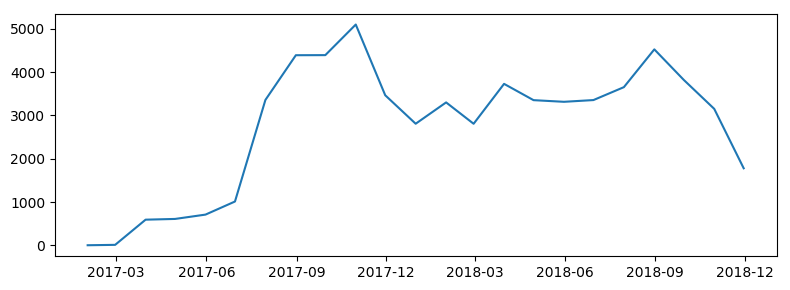

In [43]:

counts = g['year-mo'].count()

fig = plt.figure(0,figsize=(8,3), frameon=False, dpi=100,clear=True)
plt.plot(counts.index, counts)
plt.tight_layout()


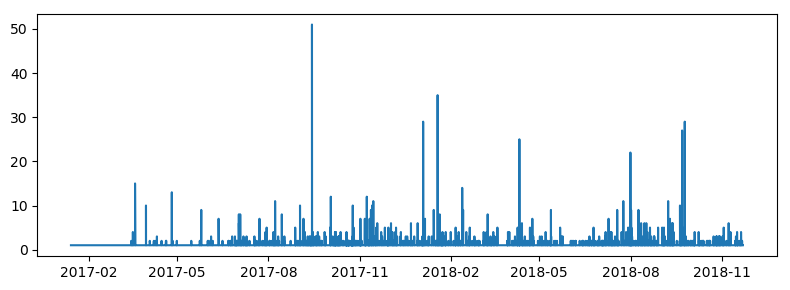

## fig = plt.figure(0,figsize=(2,3), frameon=False, dpi=100,clear=True)
plt.scatter(commit_year.index,commit_year)